#  NSGA-II solving multi-objective TSP

This notebook shows how to use NSGA-II to solve a bi-objective TSP problem.

In [16]:
using MetaJul

tsp_data_dir = joinpath(@__DIR__, "..", "resources/tspDataFiles")

"/Users/ajnebro/Softw/julia/metajul/notebooks/../resources/tspDataFiles"

In [17]:
problem = multiObjectiveTSP("kroAB100", [joinpath(tsp_data_dir, "kroA100.tsp"), joinpath(tsp_data_dir, "kroB100.tsp")]);

## Standard NSGA-II configured with default settings

In [18]:
solver::NSGAII = NSGAII(problem);

### Run the algorithm

In [19]:
optimize!(solver) ;

println("Computing time: ", computingTime(solver))

Computing time: 1614 milliseconds


### Print the results

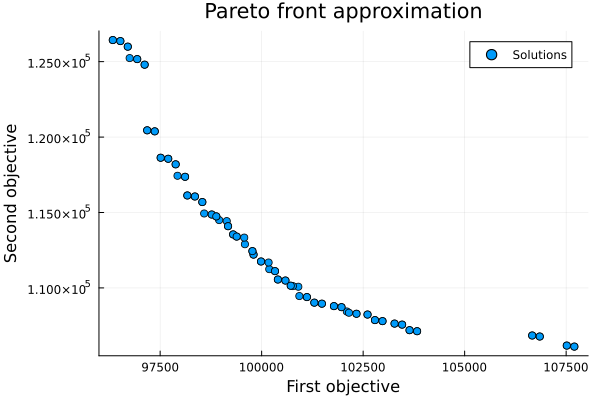

In [20]:
using Plots
 
#data to plot
x = [solution.objectives[1] for solution in foundSolutions(solver)];
y = [solution.objectives[2] for solution in foundSolutions(solver)];
 
gr();
 
scatter(x, y,  title = "Pareto front approximation", label = "Solutions")
xlabel!("First objective")
ylabel!("Second objective")

## Standard NSGA-II configured with custom settings and an observer

Evaluations: 10000
Evaluations: 20000
Evaluations: 30000
Evaluations: 40000
Evaluations: 50000
Evaluations: 60000
Evaluations: 70000
Evaluations: 80000
Evaluations: 90000
Evaluations: 100000
Evaluations: 110000
Evaluations: 120000


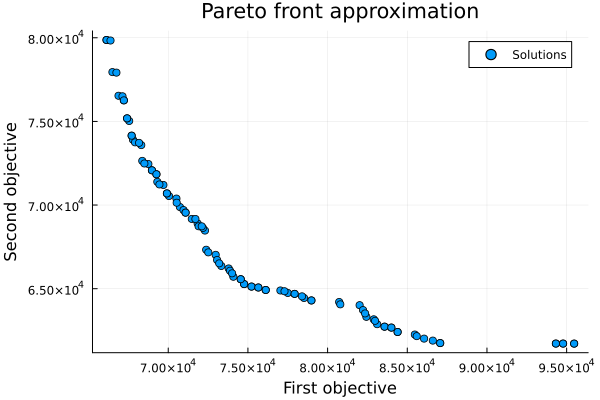

In [21]:
solver::NSGAII = NSGAII(
  problem,
  populationSize = 100, 
  termination = TerminationByEvaluations(125000),
  crossover = PMXCrossover(probability = 0.9),
  mutation = PermutationSwapMutation(probability = 0.2))

observer = EvaluationObserver(10000)
register!(observable(solver), observer)

optimize!(solver)

x = [solution.objectives[1] for solution in foundSolutions(solver)];
y = [solution.objectives[2] for solution in foundSolutions(solver)];
 
gr();
 
scatter(x, y,  title = "Pareto front approximation", label = "Solutions")
xlabel!("First objective")
ylabel!("Second objective")